In [1]:
import cv2 as cv

In [2]:
import mediapipe as mp

In [3]:
import numpy as np

In [4]:
video_dir="../../../videos"

In [5]:
import os

In [6]:
os.listdir(video_dir)

['blank', 'hello', 'how are you', 'i', 'morning', 'sorry', 'thank you']

In [7]:
processed_videos_dir='../../../processed_videos'

In [8]:
mp_drawing=mp.solutions.drawing_utils
mp_holistic=mp.solutions.holistic
holistic=mp_holistic.Holistic()

In [80]:
style1=mp_drawing.DrawingSpec((71, 237, 212),2,1)
style2=mp_drawing.DrawingSpec((67, 73, 247),2,1)

In [9]:
style1=mp_drawing.DrawingSpec((0, 0, 0),1,1)
style2=mp_drawing.DrawingSpec((0, 0, 0),2,2)
# style1=mp_drawing.DrawingSpec((255,255, 255),1,1)
# style2=mp_drawing.DrawingSpec((255, 255, 255),2,2)

In [10]:
def draw_landmarks(img,results):
    mp_drawing.draw_landmarks(img,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,style1,style2)
    mp_drawing.draw_landmarks(img,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,style1,style2)
    mp_drawing.draw_landmarks(img,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,style1,style2)
    # mp_drawing.draw_landmarks(img,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,style1,style2)

In [11]:
import matplotlib.pyplot as plt

In [20]:
white_img=cv.imread("white.png")
white_img=cv.resize(white_img,(640,480))
print(white_img.shape)

(480, 640, 3)


(480, 640, 3)


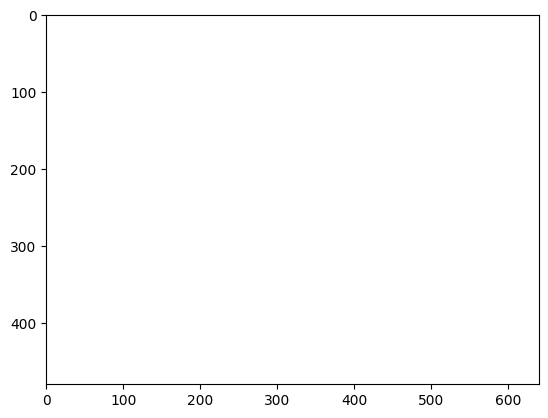

In [21]:
plt.imshow(white_img)
print(white_img.shape)

In [47]:
cap=cv.VideoCapture(os.path.join(video_dir,'blank','0.mp4'))
width=int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv.CAP_PROP_FPS)
fourcc = cv.VideoWriter_fourcc(*'XVID')
print(f"width={width}  height={height}  fps={fps}")
video_writer = cv.VideoWriter(
                os.path.join(processed_videos_dir,f'test2.avi'),
                fourcc, 
                fps,
                (640,480),
                 0
                )
for i in range(30):
    _,frame=cap.read()
  
    white_img=cv.resize(cv.imread("white.png"),(640,480))
    white=white_img
    frame=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    results=holistic.process(frame)
    frame=cv.cvtColor(frame,cv.COLOR_RGB2BGR)
    draw_landmarks(white,results)
    # cv.putText(white,f'{width,height}',(50,50),cv.FONT_HERSHEY_PLAIN,3,(0,0,255),1,cv.LINE_AA)
    white=cv.cvtColor(white,cv.COLOR_BGR2GRAY)
    video_writer.write(white)
    print(white.shape)
    if cv.waitKey(1)==27:
        break
    cv.imshow('frame',white)

cv.destroyAllWindows()
cap.release()
video_writer.release()  

width=640  height=480  fps=30.0
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)


In [23]:
video_writer.release()

In [40]:
from time import time

In [41]:
fourcc = cv.VideoWriter_fourcc(*'XVID')

In [49]:
for action in os.listdir(video_dir):
    print(action)
    os.mkdir(os.path.join(processed_videos_dir,action))

blank
hello
how are you
i
morning
sorry
thank you


In [50]:
fourcc = cv.VideoWriter_fourcc(*'XVID')

for action in os.listdir(video_dir):
    print(action)
    
    for video in os.listdir(os.path.join(video_dir,action)):
        path=os.path.join(video_dir,action,video)
        cap=cv.VideoCapture(path)
        width=int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
        height=int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
        fps=cap.get(cv.CAP_PROP_FPS)

        to_save_path=os.path.join(processed_videos_dir,action,video)
        video_writer = cv.VideoWriter(
                to_save_path,
                fourcc, 
                fps,
                (640,480),
                0
                )
        # video_writer = cv.VideoWriter(to_save_path,fourcc,30,(640,480) )
        for i in range(30):
            _,frame=cap.read()
            white_img=cv.resize(cv.imread("white.png"),(640,480))
            white=white_img
            frame=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
            results=holistic.process(frame)
            frame=cv.cvtColor(frame,cv.COLOR_RGB2BGR)
            draw_landmarks(white,results)
            white=cv.cvtColor(white,cv.COLOR_BGR2GRAY)
            video_writer.write(white) 
            # cv.putText(white,f'{video}',(50,50),cv.FONT_HERSHEY_PLAIN,3,(0,0,255),1,cv.LINE_AA)
            if cv.waitKey(1)==27:
                break
            cv.imshow('frame',white)
        
        cv.destroyAllWindows()
        cap.release()
        video_writer.release()
        

blank
hello
how are you
i
morning
sorry
thank you


['test.mp4']